#Create vertices for 2D and store in an array

In [1]:
import numpy as np
import pandas as pd
import functools 
from IPython.display import Image, display
import graphviz
import pydot
from graphviz import Source

arr = np.array([[4, 3, 2, 7], [5, 0, 1, 6], [6, 2, 3, 4], [7, 1, 0, 5]])
print(arr)
size_x = len(arr)-1
size_y = len(arr[0])-1
print(size_x)
print(size_y)

[[4 3 2 7]
 [5 0 1 6]
 [6 2 3 4]
 [7 1 0 5]]
3
3


Find Neighbors

In [2]:
def findNeighbors(i,j):
  #pos_in_sorted_indices = i in sorted_indices
  pos_index_i = i
  pos_index_j = j

  neighbor_list = []
  #corners
  if(pos_index_i == 0 and pos_index_j == 0):
    neighbor_list.append([pos_index_i+1,pos_index_j])
    neighbor_list.append([pos_index_i,pos_index_j+1])


  elif(pos_index_i == 0 and pos_index_j == size_y):
    neighbor_list.append([pos_index_i,pos_index_j-1])
    neighbor_list.append([pos_index_i+1,pos_index_j])
    neighbor_list.append([pos_index_i+1,pos_index_j-1])


  elif(pos_index_i == size_x and pos_index_j == 0):
    neighbor_list.append([pos_index_i-1,pos_index_j])
    neighbor_list.append([pos_index_i-1,pos_index_j+1])
    neighbor_list.append([pos_index_i,pos_index_j+1])


  elif(pos_index_i == size_x and pos_index_j == size_y):
    neighbor_list.append([pos_index_i,pos_index_j-1])
    neighbor_list.append([pos_index_i-1,pos_index_j])

  #boundaries
  elif((pos_index_i == 0 and pos_index_j != 0) and (pos_index_i == 0 and pos_index_j != size_y)):
    neighbor_list.append([pos_index_i,pos_index_j-1])
    neighbor_list.append([pos_index_i,pos_index_j+1])
    neighbor_list.append([pos_index_i+1,pos_index_j-1])
    neighbor_list.append([pos_index_i+1,pos_index_j])


  elif((pos_index_i != 0 and pos_index_j == 0) and (pos_index_i != size_x and pos_index_j == 0)):
    neighbor_list.append([pos_index_i-1,pos_index_j])
    neighbor_list.append([pos_index_i+1,pos_index_j])
    neighbor_list.append([pos_index_i,pos_index_j+1])
    neighbor_list.append([pos_index_i-1,pos_index_j+1])



  elif((pos_index_i == size_x and pos_index_j != 0) and (pos_index_i == size_x and pos_index_j != size_y)):
    neighbor_list.append([pos_index_i,pos_index_j-1])
    neighbor_list.append([pos_index_i,pos_index_j+1])
    neighbor_list.append([pos_index_i-1,pos_index_j])
    neighbor_list.append([pos_index_i-1,pos_index_j+1])



  elif((pos_index_i != 0 and pos_index_j == size_y) and (pos_index_i != size_x and pos_index_j == size_y)):
    neighbor_list.append([pos_index_i-1,pos_index_j])
    neighbor_list.append([pos_index_i+1,pos_index_j])
    neighbor_list.append([pos_index_i,pos_index_j-1])
    neighbor_list.append([pos_index_i+1,pos_index_j])


  #general cases
  else:
    neighbor_list.append([pos_index_i,pos_index_j-1])
    neighbor_list.append([pos_index_i-1,pos_index_j])
    neighbor_list.append([pos_index_i,pos_index_j+1])
    neighbor_list.append([pos_index_i+1,pos_index_j])
    neighbor_list.append([pos_index_i-1,pos_index_j+1])
    neighbor_list.append([pos_index_i+1,pos_index_j-1])

  return neighbor_list

Johns version

In [3]:
"""
Converting all the outputs of above 'findNeighbors' function 
into a dict and then displaying for comparison
"""

neighbor_dict = {}
for i,j in ((a,b) for a in range(4) for b in range(4)):
  neighbor_dict[(i,j)] = findNeighbors(i,j)

for key, val in neighbor_dict.items():
  print(str(key) + ':', val)

(0, 0): [[1, 0], [0, 1]]
(0, 1): [[0, 0], [0, 2], [1, 0], [1, 1]]
(0, 2): [[0, 1], [0, 3], [1, 1], [1, 2]]
(0, 3): [[0, 2], [1, 3], [1, 2]]
(1, 0): [[0, 0], [2, 0], [1, 1], [0, 1]]
(1, 1): [[1, 0], [0, 1], [1, 2], [2, 1], [0, 2], [2, 0]]
(1, 2): [[1, 1], [0, 2], [1, 3], [2, 2], [0, 3], [2, 1]]
(1, 3): [[0, 3], [2, 3], [1, 2], [2, 3]]
(2, 0): [[1, 0], [3, 0], [2, 1], [1, 1]]
(2, 1): [[2, 0], [1, 1], [2, 2], [3, 1], [1, 2], [3, 0]]
(2, 2): [[2, 1], [1, 2], [2, 3], [3, 2], [1, 3], [3, 1]]
(2, 3): [[1, 3], [3, 3], [2, 2], [3, 3]]
(3, 0): [[2, 0], [2, 1], [3, 1]]
(3, 1): [[3, 0], [3, 2], [2, 1], [2, 2]]
(3, 2): [[3, 1], [3, 3], [2, 2], [2, 3]]
(3, 3): [[3, 2], [2, 3]]


In [4]:
"""
My implementation of a dict of neighbors for each position

if the order matters for these sets of indices, i'll need to change
to a list and modify.
"""

def get_range(arr_max_idx, idx):
  """
  returns set of indices neighboring input idx, 
  between 0 and arr_max_idx (last index for this dimension)
  """
  arr_bounds = set(range(arr_max_idx+1))
  return set(range(idx-1,idx+2)).intersection(arr_bounds)

neighbor_dict2 = {(i,j): {(x,y) for x in get_range(size_x, i) for y in get_range(size_y, j) if not(x-i==y-j)} for i in range(4) for j in range(4)}

for key, val in neighbor_dict2.items():
  print(str(key) + ':', val)

(0, 0): {(0, 1), (1, 0)}
(0, 1): {(1, 0), (0, 0), (0, 2), (1, 1)}
(0, 2): {(0, 1), (0, 3), (1, 1), (1, 2)}
(0, 3): {(1, 2), (1, 3), (0, 2)}
(1, 0): {(0, 1), (2, 0), (0, 0), (1, 1)}
(1, 1): {(0, 1), (1, 2), (2, 1), (2, 0), (1, 0), (0, 2)}
(1, 2): {(1, 3), (0, 2), (2, 1), (2, 2), (0, 3), (1, 1)}
(1, 3): {(1, 2), (0, 3), (2, 3), (2, 2)}
(2, 0): {(3, 0), (1, 0), (1, 1), (2, 1)}
(2, 1): {(1, 2), (3, 0), (3, 1), (2, 0), (2, 2), (1, 1)}
(2, 2): {(1, 2), (3, 2), (1, 3), (3, 1), (2, 1), (2, 3)}
(2, 3): {(3, 2), (1, 3), (3, 3), (2, 2)}
(3, 0): {(2, 0), (3, 1), (2, 1)}
(3, 1): {(3, 0), (3, 2), (2, 1), (2, 2)}
(3, 2): {(3, 1), (2, 3), (3, 3), (2, 2)}
(3, 3): {(3, 2), (2, 3)}


In [5]:
for k,v in neighbor_dict2.items():
  nl = neighbor_dict[k]
  assert len(nl) == len(v), "length mismatch"
  # assert v == set([tuple(x) for x in nl]), "item not found. k: " + str(k) + " v: " + str(v)

# Seems your version has an incorrect case; you can check this assertion violation to see

creation of UF, UF representative and JT for Join Tree

Undirected edges

In [6]:
def minJT(i,UF, UF_dict,sorted_indices):
  
  JT_vertices = []
  UF_temp = []
  UF_temp.append(sorted_indices[i])
  UF.append(UF_temp)
  key = sorted_indices[i]
  UF_dict[key] = UF_temp
  JT_vertices.append(UF_temp)
  
  return JT_vertices

In [7]:
def find(UF_dict, vertex):
  keys = []
  for key, value in UF_dict.items():
    for i in range(0,len(value)):
      if value[i] == vertex :
        return key
    
  


In [8]:
def common(UF_dict,vertex, other_key):
  '''
  This is the "Union" operation of UF algo.
  Merges any non-disjoint sets, and sets the most recently
  updated set to the most recent vertex
  '''
  val = []
  new_list =[]
  keys=[]
  new_dict = {}

  # I remade in the below code, because
  #   I didn't understand the functionality 
  #   originally. But fine to fix the original maybe.
  #   If my version is kept, some refactoring can be done.

  for k,v in UF_dict.items():
    vals = v
    for k2,v2 in UF_dict.items(): # compare pairs in the product of UF sets
      if k2 == k:
        continue
      if 0 < len(set(vals).intersection(set(v2))):
        # non-empty intersection, so merge the sets
        vals = list(set(vals).union(set(v2)))
      else:
        # empty intersection, so leave this pair in the dict as is
        new_dict[k2] = v2
    if not vals == v:
      # if here, should have merged some set
      # only updated one element, so
      # set the newly merged set in the dict and stop.
      new_dict[vertex] = vals
      UF_dict = new_dict
      break
    else:
      # this set does not intersect others
      # thus new_dict should be the same as UF_dict
      # start over and check other sets
      new_dict[k] = vals # just to ensure we checked everything
      assert new_dict == UF_dict, "dicts should be equal if no intersections found"
      new_dict = {} # start over

  if not new_dict: # no merges, just set pointer to most recent vertex
    UF_dict[vertex] = UF_dict.pop(other_key)
  else: # some merge happened, so copy over the new dict.
    UF_dict = new_dict
  
  return UF_dict


  # 
  # Problem was here; this tried to swap the passed in
  #   vertex multiple times (so key error)... maybe
  #   some other issues, but is probably easily fixed
  # 
  # for key,value in UF_dict.items():
  #   val.append(value)
  #   keys.append(key)

  # if len(val) > 1 :
  #   for i in range(0,len(val)-1):
  #     for j in range(1,len(val)):
  #       common_list = set(val[i]).intersection(val[j])
  #       if len(common_list) > 0:
  #         new_list.extend(val[i])
  #         new_list.extend(val[j])
  #         new_list = list(set(new_list))
  #         UF_dict.pop(keys[i])
  #         UF_dict.pop(keys[j])
  #         common_element = list(common_list)[0]
  #         UF_dict[common_element] = new_list

  #       else:
  #         # Problem is here.
  #         UF_dict[vertex] = UF_dict.pop(other_key)

  # else:
  #   UF_dict[vertex] = UF_dict.pop(other_key)



In [9]:
def update(UF_dict, key1, vertex2):
  keys = []
  for key, value in UF_dict.items():
    if key1 == key:
      value.append(vertex2)
      keys.append(key)
  if len(keys) == 1:
    UF_dict = common(UF_dict, vertex2, keys[0]) #if common elements then merge and update
  return UF_dict
 
      
  

In [10]:
def getJT():
  UF_JT = []
  UF_representative_JT = []
  neighbors_of_each_JT = []
  UF_dict_JT = {}
  JT = []
  JT_vertices = []
  JT_edges = []
  edges = []
  #sorted indices
  arr_temp = arr.flatten()
  sorted_indices = np.argsort(arr_temp)
  
  
  #sorted values
  arr_temp = arr.flatten()
  arr_temp.sort()
  sorted_vertices = arr_temp
  min_val=min(sorted_vertices)
  
  #sorted indices in terms of 2D matrix
  index_i = [0 for x in range(0,len(sorted_indices))]
  index_j = [0 for x in range(0,len(sorted_indices))]
  for i in range(0,len(arr)):
    for j in range(0,len(arr[i])):
      ind = len(arr[i])*i + j
      pos = sorted_indices.tolist().index(ind)
      index_i[pos] = i
      index_j[pos] = j
  
  #finding neighbors of each index
  for i in range(0,len(sorted_vertices)):
    neighbors = findNeighbors(index_i[i],index_j[i])
    neighbor_index = []
    for j in range(0,len(neighbors)):
      m = (size_y+1)*index_i[i]+index_j[i]
      n = (size_y+1)*neighbors[j][0]+neighbors[j][1]
      neighbor_index.append(n)
      edges.append([m,n])
    neighbors_of_each_JT.append(neighbor_index)

  for i in range(0,len(sorted_vertices)):
      #print(UF_dict_JT)\
      for j in range(0,len(edges)):
        #print(sorted_indices[i],edges[j][1])
        
        if edges[j][1]==sorted_indices[i]:
          i_dashed = find(UF_dict_JT, edges[j][0])
          #print(i_dashed)
          
          j_dashed = find(UF_dict_JT, edges[j][1])
          #print(j_dashed)
         
          if i_dashed != j_dashed:   # this will be equal if the edge is already present otherwise always not equal
            if i_dashed != None :
              JT_edges.append([i_dashed,edges[j][1]])
              JT_vertices.append(edges[j][1])
            UF_dict_JT = update(UF_dict_JT, i_dashed, edges[j][1])
          else:
            if i_dashed is None:
              JT.append(minJT(i,UF_JT, UF_dict_JT,sorted_indices))
              JT_vertices.append(sorted_indices[i])
  
  graph = pydot.Dot('Join Tree', graph_type='graph')

  # Add nodes
  for i in range(0,len(JT_vertices)):
    my_node = pydot.Node(str(JT_vertices[i]), label=str(JT_vertices[i]))
    graph.add_node(my_node)
  
  # Or, without using an intermediate variable:
  #graph.add_node(pydot.Node('b', shape='circle'))

  # Add edges
  for i in range(0,len(JT_edges)):
    my_edge = pydot.Edge(str(JT_edges[i][0]), str(JT_edges[i][1]), color='blue')
    graph.add_edge(my_edge)
  

  
  plt = Image(graph.create_png())
  display(plt)

In [11]:
if not {}:
  print(0)
else:
  print(1)

0


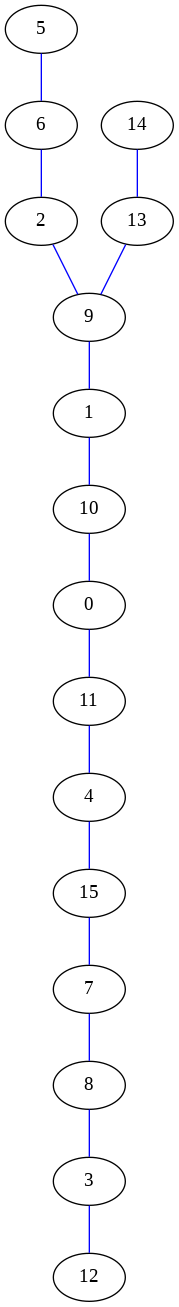

In [12]:
getJT()

In [13]:
def maxST(i,UF, UF_dict,reverse_sorted_indices):
  
  ST_vertices = []
  UF_temp = []
  UF_temp.append(reverse_sorted_indices[i])
  UF.append(UF_temp)
  key = reverse_sorted_indices[i]
  UF_dict[key] = UF_temp
  ST_vertices.append(UF_temp)
  
  return ST_vertices

In [14]:
reverse_sorted_indices = []
arr_temp = arr.flatten()
sorted_indices = np.argsort(arr_temp)

for i in range(len(sorted_indices)-1,-1,-1):
  reverse_sorted_indices.append(sorted_indices[i])

print(reverse_sorted_indices)

rev_ids = np.flip(sorted_indices)
print(list(rev_ids))
assert list(rev_ids) == reverse_sorted_indices, "rev sort mismatch"

print()
print()

reverse_sorted_vertices =[]
arr_temp.sort()
for i in range(len(arr_temp)-1,-1,-1):
  reverse_sorted_vertices.append(arr_temp[i])
max_val=max(reverse_sorted_vertices)
print(reverse_sorted_vertices)

rev_verts = np.flip(arr_temp)
print(list(rev_verts))
assert list(rev_verts) == reverse_sorted_vertices, "rev vert mismatch"

[12, 3, 8, 7, 15, 4, 11, 0, 10, 1, 9, 2, 13, 6, 14, 5]
[12, 3, 8, 7, 15, 4, 11, 0, 10, 1, 9, 2, 13, 6, 14, 5]


[7, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1, 0, 0]
[7, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1, 0, 0]


In [15]:
reverse_sorted_indices = []
arr_temp = arr.flatten()
sorted_indices = np.argsort(arr_temp)

for i in range(len(sorted_indices)-1,-1,-1):
  reverse_sorted_indices.append(sorted_indices[i])

reverse_sorted_vertices =[]
arr_temp.sort()
for i in range(len(arr_temp)-1,-1,-1):
  reverse_sorted_vertices.append(arr_temp[i])
max_val=max(reverse_sorted_vertices)

#sorted indices in terms of 2D matrix
index_i = [0 for x in range(0,len(reverse_sorted_indices))]
index_j = [0 for x in range(0,len(reverse_sorted_indices))]
for i in range(0,len(arr)):
  for j in range(0,len(arr[i])):
    ind = len(arr[i])*i + j
    pos = reverse_sorted_indices.index(ind)
    index_i[pos] = i
    index_j[pos] = j



In [16]:
edges = []
neighbors_of_each_ST = []
#finding neighbors of each index
for i in range(0,len(reverse_sorted_vertices)):
  neighbors = list(neighbor_dict2[(index_i[i],index_j[i])])
  neighbor_index = []
  for j in range(0,len(neighbors)):
    m = (size_y+1)*index_i[i]+index_j[i]
    n = (size_y+1)*neighbors[j][0]+neighbors[j][1]
    neighbor_index.append(n)
    edges.append([m,n])

In [17]:
def getST():
  UF_ST = []
  UF_representative_ST = []
  neighbors_of_each_ST = []
  UF_dict_ST = {}
  ST = []
  ST_vertices = []
  ST_edges = []
  edges = []
  reverse_sorted_indices =[]
  #sorted indices
  arr_temp = arr.flatten()
  sorted_indices = np.argsort(arr_temp)
  
  for i in range(len(sorted_indices)-1,-1,-1):
    reverse_sorted_indices.append(sorted_indices[i])
  
  print(reverse_sorted_indices)
  
  
  reverse_sorted_vertices =[]
  #sorted values
  arr_temp = arr.flatten()
  arr_temp.sort()
  for i in range(len(arr_temp)-1,-1,-1):
    reverse_sorted_vertices.append(arr_temp[i])
  max_val=max(reverse_sorted_vertices)

 #sorted indices in terms of 2D matrix
  index_i = [0 for x in range(0,len(reverse_sorted_indices))]
  index_j = [0 for x in range(0,len(reverse_sorted_indices))]
  for i in range(0,len(arr)):
    for j in range(0,len(arr[i])):
      ind = len(arr[i])*i + j
      pos = reverse_sorted_indices.index(ind)
      index_i[pos] = i
      index_j[pos] = j

 #finding neighbors of each index
  for i in range(0,len(reverse_sorted_vertices)):
    neighbors = list(neighbor_dict2[(index_i[i],index_j[i])])
    neighbor_index = []
    for j in range(0,len(neighbors)):
      m = (size_y+1)*index_i[i]+index_j[i]
      n = (size_y+1)*neighbors[j][0]+neighbors[j][1]
      neighbor_index.append(n)
      edges.append([m,n])
    neighbors_of_each_ST.append(neighbor_index)

  print(edges)
  for i in range(0,len(reverse_sorted_vertices)):
    for j in range(0,len(edges)):
      if edges[j][1]==reverse_sorted_indices[i]:
        i_dashed = find(UF_dict_ST, edges[j][0])
        j_dashed = find(UF_dict_ST, edges[j][1])
        
        if i_dashed != j_dashed:   # this will be equal if the edge is already present otherwise always not equal
          if i_dashed != None :
            ST_edges.append([i_dashed,edges[j][1]])
            ST_vertices.append(edges[j][1])
            UF_dict_ST = update(UF_dict_ST, i_dashed, edges[j][1])
        else:
          if i_dashed is None :
            ST.append(maxST(i,UF_ST, UF_dict_ST,reverse_sorted_indices))
            ST_vertices.append(reverse_sorted_indices[i])
        #if i_dashed == j_dashed and i_dashed == None:
          #if j_dashed == None :
            #ST.append(maxST(i,UF_ST, UF_dict_ST,reverse_sorted_indices))
            #ST_vertices.append(edges[j][1])
            #UF_dict_ST = update(UF_dict_ST, i_dashed, edges[j][1])
        #print(ST_vertices)


  graph = pydot.Dot('Join Tree', graph_type='graph')

  # Add nodes
  for i in range(0,len(ST_vertices)):
    my_node = pydot.Node(str(ST_vertices[i]), label=str(ST_vertices[i]))
    graph.add_node(my_node)
  
  # Or, without using an intermediate variable:
  #graph.add_node(pydot.Node('b', shape='circle'))

  # Add edges
  for i in range(0,len(ST_edges)):
    my_edge = pydot.Edge(str(ST_edges[i][0]), str(ST_edges[i][1]), color='blue')
    graph.add_edge(my_edge)
  

  
  plt = Image(graph.create_png())
  display(plt)
  print(UF_dict_ST)
  print(ST_edges)
  print(ST_vertices)

[12, 3, 8, 7, 15, 4, 11, 0, 10, 1, 9, 2, 13, 6, 14, 5]
[[12, 8], [12, 13], [12, 9], [3, 6], [3, 7], [3, 2], [8, 12], [8, 4], [8, 5], [8, 9], [7, 6], [7, 3], [7, 11], [7, 10], [15, 14], [15, 11], [4, 1], [4, 8], [4, 0], [4, 5], [11, 14], [11, 7], [11, 15], [11, 10], [0, 1], [0, 4], [10, 6], [10, 14], [10, 7], [10, 13], [10, 9], [10, 11], [1, 4], [1, 0], [1, 2], [1, 5], [9, 6], [9, 12], [9, 13], [9, 8], [9, 10], [9, 5], [2, 1], [2, 3], [2, 5], [2, 6], [13, 12], [13, 14], [13, 9], [13, 10], [6, 7], [6, 2], [6, 9], [6, 10], [6, 3], [6, 5], [14, 13], [14, 11], [14, 15], [14, 10], [5, 1], [5, 6], [5, 9], [5, 8], [5, 4], [5, 2]]


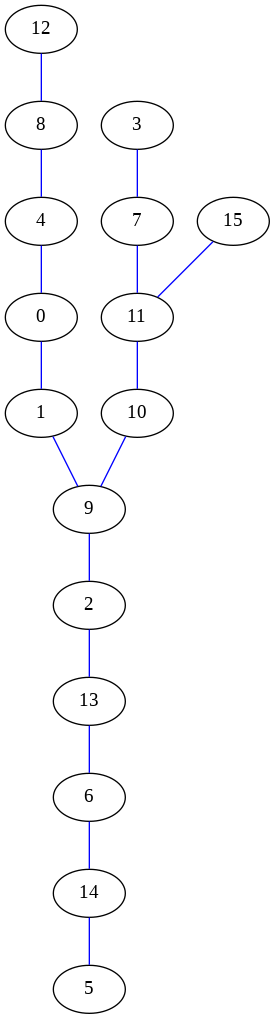

{5: [0, 1, 3, 4, 7, 8, 9, 10, 11, 12, 15, 2, 13, 6, 14, 5]}
[[12, 8], [3, 7], [8, 4], [7, 11], [15, 11], [4, 0], [11, 10], [0, 1], [1, 9], [10, 9], [9, 2], [2, 13], [13, 6], [6, 14], [14, 5]]
[12, 3, 8, 7, 15, 4, 11, 11, 0, 10, 1, 9, 9, 2, 13, 6, 14, 5]


In [18]:
getST()

#Join Tree creation



creation of UF, UF representative and ST for Split Tree

#Split Tree creation